# Image Classification

## 1. Data Collection

In [1]:
# loading the dataset
from tensorflow.keras.datasets import fashion_mnist
(xtrain,ytrain),(xtest,ytest) = fashion_mnist.load_data()

In [2]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal",
               "Shirt","Sneaker","Bag","Ankle boot"]
len(class_names)

10

# 2. Data Exploration

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

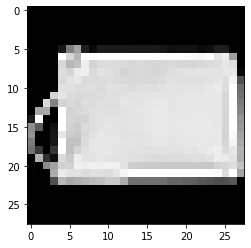

8
Bag


In [5]:
id = 3680
plt.imshow(xtrain[id],cmap='gray')
plt.show()
print(ytrain[id])
print(class_names[ytrain[id]])

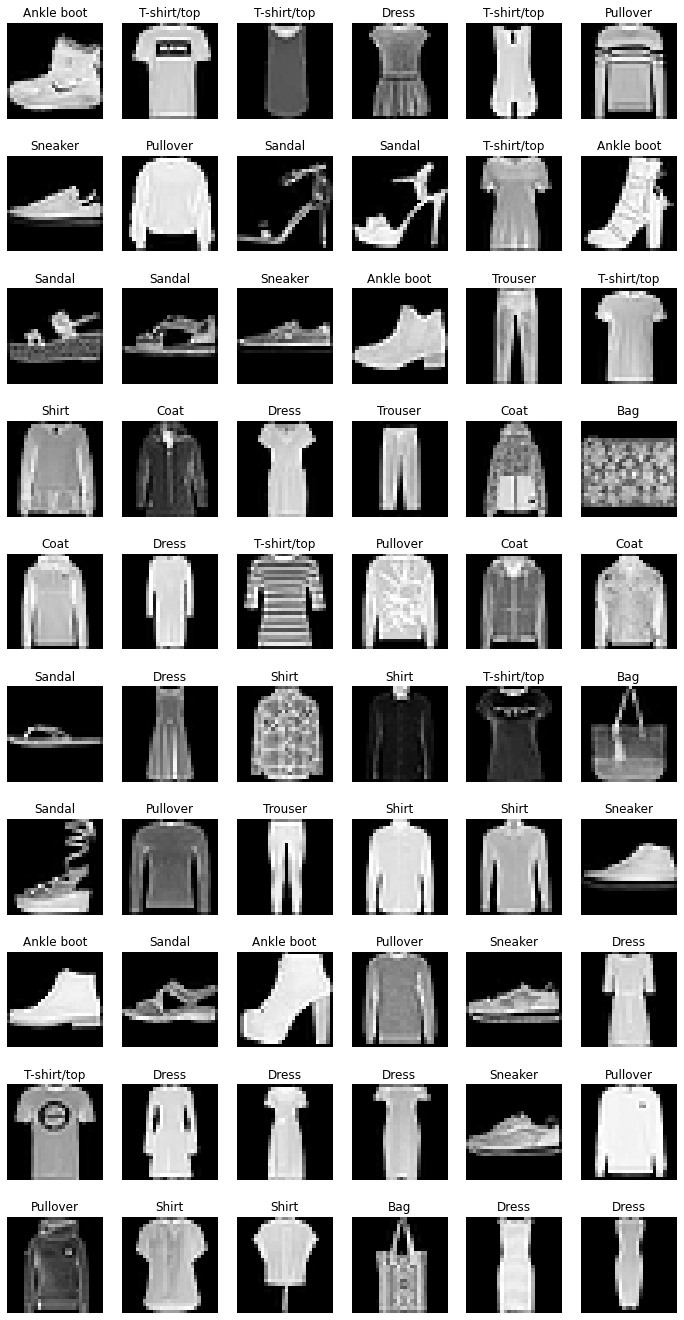

In [6]:
fig,axes = plt.subplots(nrows=10,ncols=6,figsize=(12,24))
axes = axes.flatten()
for i,ax in zip(range(60),axes):
    ax.imshow(xtrain[i],cmap='gray')
    ax.set_title(class_names[ytrain[i]])
    ax.axis(False)
plt.show()

# 3. Data Preprocessing

In [7]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
# reshape images to invlove the channel value
xtrain = xtrain.reshape(60000,28,28,1)
xtest = xtest.reshape(10000,28,28,1)
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
# scale the images
xtrain = xtrain/255
xtest = xtest/255

In [10]:
print(ytrain.shape)
print(ytest.shape)
ytrain

(60000,)
(10000,)


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
# one hot encode the labels
from tensorflow.keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)
print(ytrain.shape)
print(ytest.shape)

(60000, 10)
(10000, 10)


In [12]:
ytrain[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# 4. Modelling the network

<img src = "lenet5.PNG">

In [13]:
from tensorflow.keras import models,layers
import tensorflow as tf

In [15]:
tf.random.set_seed(5)


input_layer = layers.Input(shape=(28,28,1))
L1 = layers.Conv2D(filters=6,kernel_size=(3,3),activation='relu')(input_layer)
L2 = layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu')(L1)
L3 = layers.MaxPooling2D(pool_size=(2,2))(L2)

L4 = layers.Conv2D(filters=20,kernel_size=(3,3),activation='relu')(L3)
L5 = layers.Conv2D(filters=25,kernel_size=(3,3),activation='relu')(L4)
L6 = layers.MaxPooling2D(pool_size=(2,2))(L5)

L7 = layers.Flatten()(L6)

L8 = layers.Dense(120,activation='relu')(L7)
L9 = layers.Dense(84,activation='relu')(L8)
output_layer = layers.Dense(10,activation='softmax')(L9)

model = models.Model(inputs=input_layer,outputs=output_layer)

In [16]:
from tensorflow.keras.utils import plot_model
import pydot,graphviz
plot_model(model)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [17]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 10)        550       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 20)        1820      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 25)          4525      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 25)          0     

In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=10,batch_size=1000,verbose=True,validation_data=(xtest,ytest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 277us/sample - loss: 1.1914 - accuracy: 0.6006 - val_loss: 0.7506 - val_accuracy: 0.7205
Epoch 2/10
60000/60000 [==============================] - 15s 258us/sample - loss: 0.6349 - accuracy: 0.7580 - val_loss: 0.5849 - val_accuracy: 0.7768
Epoch 3/10
60000/60000 [==============================] - 16s 266us/sample - loss: 0.5450 - accuracy: 0.7909 - val_loss: 0.5505 - val_accuracy: 0.7893
Epoch 4/10
60000/60000 [==============================] - 16s 272us/sample - loss: 0.4904 - accuracy: 0.8157 - val_loss: 0.4784 - val_accuracy: 0.8237
Epoch 5/10
60000/60000 [==============================] - 16s 261us/sample - loss: 0.4483 - accuracy: 0.8360 - val_loss: 0.4529 - val_accuracy: 0.8370
Epoch 6/10
60000/60000 [==============================] - 16s 266us/sample - loss: 0.4221 - accuracy: 0.8459 - val_loss: 0.4252 - val_accuracy: 0.8440
Epoch 7/10
60000/60000 [====================

In [62]:
model.fit(xtrain,ytrain,epochs=10,batch_size=1000,verbose=True,validation_data=(xtest,ytest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 262us/sample - loss: 0.3237 - accuracy: 0.8827 - val_loss: 0.3394 - val_accuracy: 0.8773
Epoch 2/10
60000/60000 [==============================] - 16s 262us/sample - loss: 0.3114 - accuracy: 0.8867 - val_loss: 0.3427 - val_accuracy: 0.8756
Epoch 3/10
60000/60000 [==============================] - 16s 264us/sample - loss: 0.3065 - accuracy: 0.8884 - val_loss: 0.3424 - val_accuracy: 0.8776
Epoch 4/10
60000/60000 [==============================] - 17s 288us/sample - loss: 0.2997 - accuracy: 0.8904 - val_loss: 0.3191 - val_accuracy: 0.8844
Epoch 5/10
60000/60000 [==============================] - 17s 289us/sample - loss: 0.2882 - accuracy: 0.8950 - val_loss: 0.3156 - val_accuracy: 0.8877
Epoch 6/10
60000/60000 [==============================] - 16s 268us/sample - loss: 0.2845 - accuracy: 0.8953 - val_loss: 0.3186 - val_accuracy: 0.8836
Epoch 7/10
60000/60000 [====================

# 5. Performance Analysis

In [19]:
ypred = model.predict(xtest)
ypred = np.array([np.argmax(i) for i in ypred])
ytest2 = np.array([np.argmax(i) for i in ytest])

In [51]:
ypred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(ytest2,ypred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.75      0.85      0.79      1000
           3       0.82      0.93      0.87      1000
           4       0.79      0.80      0.79      1000
           5       0.98      0.95      0.97      1000
           6       0.73      0.52      0.61      1000
           7       0.93      0.95      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [55]:
pd.DataFrame(ytrain).sum()

0    6000.0
1    6000.0
2    6000.0
3    6000.0
4    6000.0
5    6000.0
6    6000.0
7    6000.0
8    6000.0
9    6000.0
dtype: float32

In [57]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(ytest2,ypred),columns=class_names,index=class_names)

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,836,0,31,55,10,3,60,0,5,0
Trouser,2,967,0,24,5,0,0,0,2,0
Pullover,12,0,851,13,71,0,49,0,4,0
Dress,14,2,14,929,16,0,21,0,4,0
Coat,1,2,94,47,800,0,55,0,1,0
Sandal,0,0,0,0,0,952,0,35,0,13
Shirt,151,3,138,59,112,0,523,0,14,0
Sneaker,0,0,0,0,0,9,0,946,1,44
Bag,1,2,12,3,2,1,4,5,969,1
Ankle boot,0,0,1,0,0,4,0,32,0,963


# Exploration

In [20]:
weights = model.get_weights()
len(weights)

14

In [21]:
weights[0].shape

(3, 3, 1, 6)

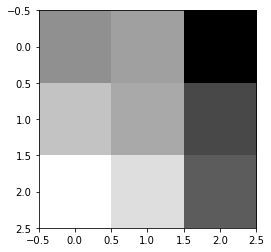

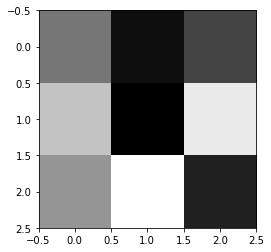

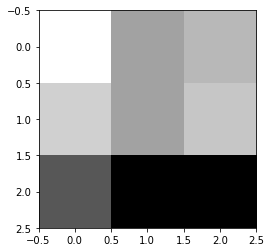

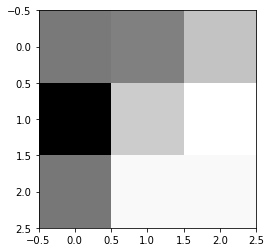

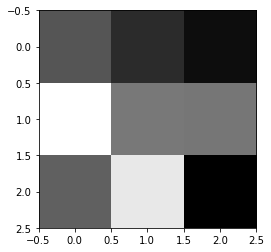

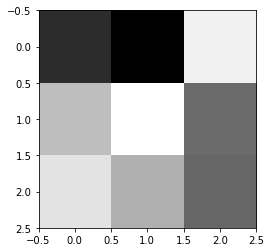

In [22]:
for i in range(6):
    plt.imshow(weights[0][:,:,:,i].reshape(3,3),cmap='gray')
    plt.show()

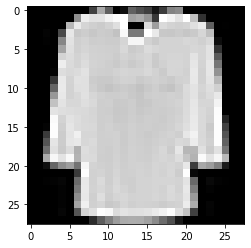

In [25]:
plt.imshow(xtest[145].reshape(28,28),cmap='gray')
plt.show()

In [27]:
model2 = models.Model(inputs=input_layer,outputs=L1)
featuremap = model2.predict(xtest[145].reshape(1,28,28,1))
featuremap.shape

(1, 26, 26, 6)

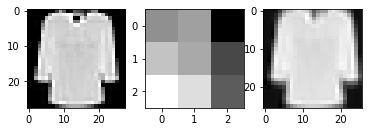

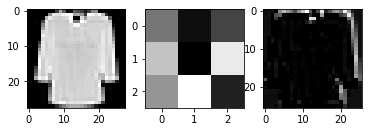

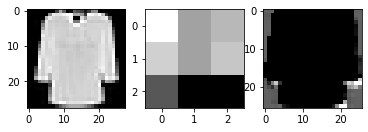

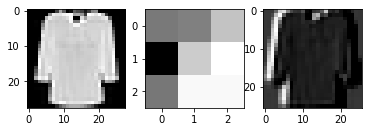

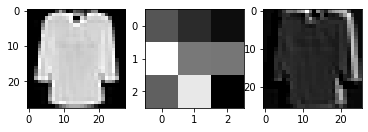

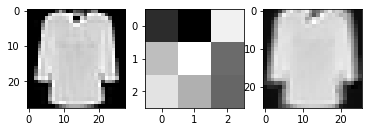

In [28]:

for i in range(6):
    plt.subplot(131)
    plt.imshow(xtest[145].reshape(28,28),cmap='gray')
    plt.subplot(132)
    plt.imshow(weights[0][:,:,:,i].reshape(3,3),cmap='gray')
    plt.subplot(133)
    plt.imshow(featuremap[:,:,:,i].reshape(26,26),cmap='gray')
    plt.show()